# Part II: Search from beginning to end
In this part your code will try to find the shortest path between two points.


## Conventions
Your serach always starts from the center of the RED box and ends at the center of the GREEN one.  

BLACK is always a wall that your path CANNOT pass through. Hence, you can assume that a black pixel has infinite cost, whatever that means.  

Color values for default colors are as follows:
BLACK = (0,0,0)
RED = (255,0,0)
GREEN = (0,255,0)

Cost of all RED and GREEN pixels are all 1.  

For all other colors in the search image you will be given a dictionary that contains color values and cost of traversing a pixel with that color.  

You can only move to 4-neighbors of a pixel.  

Once you find the path, mark it pixel by pixel on the map with a distinct color and display it at the end.

Let's import the weird maze generator.

In [2]:
from images4 import aMaze

In [3]:
import numpy as np  
from numpy.linalg import matrix_rank as rank
import matplotlib.pyplot as plt
from math import *


## Get a test image


array([[255, 255, 255,   4],
       [  0,   0, 150,   6],
       [150, 150,   0,  10],
       [150,   0, 150,   2],
       [  0, 150, 150,   8],
       [222,  55, 222,  14],
       [  0,  99,  55,  12]])

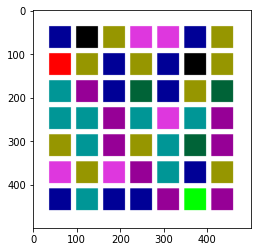

In [42]:
mazeImg, color_costs = aMaze() # get the maze image and the color costs
plt.imshow(mazeImg) # show the maze image
color_costs = list(color_costs.values()) # convert the color costs to a list
color_costs_user=np.zeros((7,3),dtype=int) # create a matrix of zeros
color_costs_user_2=np.zeros((7,1),dtype=int) # create a matrix of zeros
# flatten color_costs to a 2D array 
for i in range (len(color_costs)): # for each color cost
    color_costs_user_2[i]=color_costs[i][1] # get the second element of the list
    color_costs_user[i] = list(color_costs[i][0]) # get the first element of the list
color_costs = np.concatenate((color_costs_user, color_costs_user_2), axis=1) # concatenate the two matrices
color_costs 

In [16]:
# import any additional library realted to this part and provide references
# a lot of imports, in case you need more you are welcome to add here

from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement


In [17]:
def heuristic(x1,x2,y1,y2):
    '''
    this function is used to calculate the heuristic value for the A* algorithm as manhattan distance
    the solutution is called from the AStarFinder class in the pathfinding library which uses its own heuristic function
    the heuristic function in the library also uses the manhattan distance when DiagonalMovement is set to DiagonalMovement.never 
    which is the default value and used here.
    the instructor (Buğra Hoca) is contacted to explain the heuristic function usage problem.
    '''
    return abs(x1-x2)+abs(y1-y2)  # manhattan distance


In [18]:
def find_start_and_finish(mazeImg):
    '''
    this funtion finds the centers of green and red boxes in mazeImg
    '''
    # find the centers of the boxes
    reds=[] # list of red boxes
    greens=[] # list of green boxes
    gx=0 # x coordinate of green box
    gy=0 # y coordinate of green box
    rx=0 # x coordinate of red box
    ry=0 # y coordinate of red box
    for i in range(len(mazeImg)): # loop through the rows
        for j in range(len(mazeImg[0])): # loop through the columns
            if (mazeImg[i][j][0] == 0 and mazeImg[i][j][1] == 255 and mazeImg[i][j][2] == 0): # if the pixel is green
               greens.append([i,j]) # append the coordinates of the green box to the list
            elif (mazeImg[i][j][0] == 255 and mazeImg[i][j][1] == 0 and mazeImg[i][j][2] == 0): # if the pixel is red
               reds.append([i,j]) # append the coordinates of the red box to the list

    for i,j in greens:  # average of green coordinates
        gx+=i # sum of green coordinates
        gy+=j # sum of green coordinates
    gx=gx/len(greens) # average of green coordinates
    gy=gy/len(greens) # average of green coordinates

    for i,j in reds:  # average of red coordinates
        rx+=i # sum of red coordinates
        ry+=j # sum of red coordinates
    rx=rx/len(reds) # average of red coordinates
    ry=ry/len(reds) # average of red coordinates
    return rx,ry,gx,gy # return the coordinates of the centers of the red and green boxes
    

In [43]:
# cost function to be used in uniform cost will be here
def cost(mazeImg,color_costs): 
    '''
    this function creates an array with the cost of each pixel in mazeImg
    '''
    cost_array=np.zeros((mazeImg.shape[0],mazeImg.shape[1])) # create an array of zeros with the same size as mazeImg
    for i in range(len(mazeImg)): # loop through the rows
        for j in range(len(mazeImg[0])): # loop through the columns
            for k in range(len(color_costs)): # loop through the color costs
                if (mazeImg[i][j][0] == color_costs[k][0] and mazeImg[i][j][1] == color_costs[k][1] and mazeImg[i][j][2] == color_costs[k][2]): # if the pixel is the same as the color cost
                    cost_array[i][j]=color_costs[k][3] # set the cost of the pixel to the cost of the color cost
            if (mazeImg[i][j][0] == 0 and mazeImg[i][j][1] == 255 and mazeImg[i][j][2] == 0): # if the pixel is green
                cost_array[i][j]=1 # set the cost of the pixel to 1
            elif (mazeImg[i][j][0] == 255 and mazeImg[i][j][1] == 0 and mazeImg[i][j][2] == 0): # if the pixel is red
                cost_array[i][j]=1 # set the cost of the pixel to 1
            elif (mazeImg[i][j][0] == 0 and mazeImg[i][j][1] == 0 and mazeImg[i][j][2] == 0): # if the pixel is black
                cost_array[i][j]=90000000 # set the cost of the pixel to -1
    return cost_array # return the cost array
    


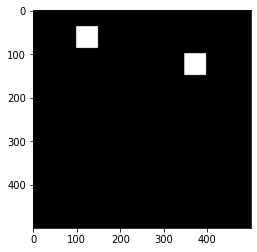

In [44]:
rx,ry,gx,gy=find_start_and_finish(mazeImg) # find the centers of the red and green boxes
img=cost(mazeImg,color_costs) # get the cost array
try:
    grid.cleanup # clean up the grid
except:
    pass
grid = Grid(matrix=img) # create a grid object with the cost array
start = grid.node(int(rx), int(ry)) # create a start node with the coordinates of the red box center
end = grid.node(int(gx), int(gy)) # create an end node with the coordinates of the green box center
finder = AStarFinder(diagonal_movement=DiagonalMovement.never, time_limit=inf,max_runs=600000) # create an A* finder object with DiagonalMovement.never as its value for diagonal movement 
path, runs = finder.find_path(start, end, grid) # find the path between the start and end nodes with the grid object and return the path and the number of runs of the algorithm 

226054

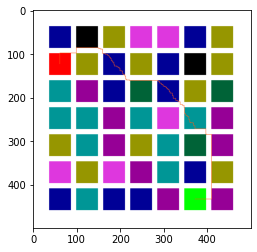

In [45]:
road=[] # list of coordinates of the path
for i in range(len(path)): # loop through the path
    road.append(list(path[i])) # append the coordinates of the path to the list
for i,j in road: # loop through the coordinates of the path
    mazeImg[i][j]=[255,90,20] # set the pixel to orange
plt.imshow(mazeImg) # show the maze image with the path in orange